# Исследовательский анализ данных в Python и проверка гипотез.
- Автор: Загиров А.А.


## Цели и задачи проекта

Провести исследовательский анализ данных в Python, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами. 
С наступлением осени увеличилось количество заказов, однако у средней стоимости был тренд к снижению. Необходимо выяснить с чем это могло быть связано.

## Описание данных
Есть данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. 
Датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных, 
`final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия, 
`final_tickets_tenge_df.csv` с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге.

## Содержимое проекта
- Загрузка данных и знакомство с ними
- Предобработка данных и подготовка их к исследованию
- Исследовательский анализ данных
- Статистический анализ данных
- Общий вывод и рекомендации

### Загрузка данных и знакомство с ними
Загрузим данные пользователей из файлов `final_tickets_orders_df.csv` и `final_tickets_events_df.csv`

In [1]:
# Импортируем библиотеки
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import NormalIndPower

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Выгружаем данные в переменные
final_tickets_orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
final_tickets_events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
final_tickets_tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [3]:
# Выводим первые строки датафрейма на экран
final_tickets_orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
# Выводим информацию о датафрейме 
final_tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
final_tickets_events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [6]:
final_tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [7]:
final_tickets_tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [8]:
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


- Датафрейм "final_tickets_orders_df" содержит 14 столбцов 290849 строк. Названия соответствуют содержанию столбцов. Больше всего пропусков в столбце "days_since_prev", видимо это потому что в этом столбце количество дней с предыдущей покупки для каждого пользователя, но первые покупки соответственно не имеют этих зачений. Тип данных в столбцах "created_dt_msk" и "created_ts_msk" не соответствует, необходимо тип данных связанный со временем. 
В столбце "age_limit" встречаются значения равные "0", что может обозначать пропуски в данных или отсутствие информации. 
- Датафрейм "final_tickets_events_df" содержит 11 столбцов 22427 строк. Пропусков нет.
- Датафрейм "final_tickets_tenge_df" содержит 4 столбца 357 строк. Названия соответствуют содержанию столбцов. Пропусков нет.

 ### Предобработка данных и подготовка их к исследованию

In [9]:
# приводим данные в соответствующий тип в датафрейме 
final_tickets_orders_df['created_dt_msk'] = pd.to_datetime(final_tickets_orders_df['created_dt_msk'], format='%Y-%m-%d')
final_tickets_orders_df['created_ts_msk'] = pd.to_datetime(final_tickets_orders_df['created_ts_msk'])
final_tickets_tenge_df['data'] = pd.to_datetime(final_tickets_tenge_df['data'], format='%Y-%m-%d')

# снижаем размерность данных 
final_tickets_orders_df['age_limit'] = pd.to_numeric(final_tickets_orders_df['age_limit'], downcast='integer')
final_tickets_orders_df['tickets_count'] = pd.to_numeric(final_tickets_orders_df['tickets_count'], downcast='integer')
final_tickets_tenge_df['nominal'] = pd.to_numeric(final_tickets_tenge_df['nominal'], downcast='integer')


In [10]:
final_tickets_orders_df.isna().mean().sort_values()

order_id                 0.000000
user_id                  0.000000
created_dt_msk           0.000000
created_ts_msk           0.000000
event_id                 0.000000
cinema_circuit           0.000000
age_limit                0.000000
currency_code            0.000000
device_type_canonical    0.000000
revenue                  0.000000
service_name             0.000000
tickets_count            0.000000
total                    0.000000
days_since_prev          0.075434
dtype: float64

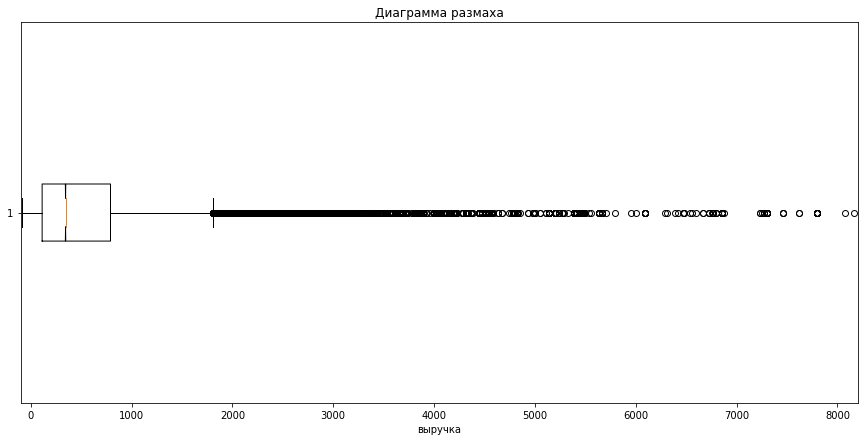

In [11]:
# Строим диаграмму размаха значений в столбце revenue
fig = plt.figure(figsize=(15, 7))
 
ax = fig.add_subplot(111)
plt.boxplot(final_tickets_orders_df[final_tickets_orders_df['currency_code']=='rub']['revenue'], ax.set_xlim(-100, 8200),  vert=False)

# Добавляем заголовок и метки оси
plt.title('Диаграмма размаха')
plt.xlabel('выручка')

# Выводим график
plt.show()

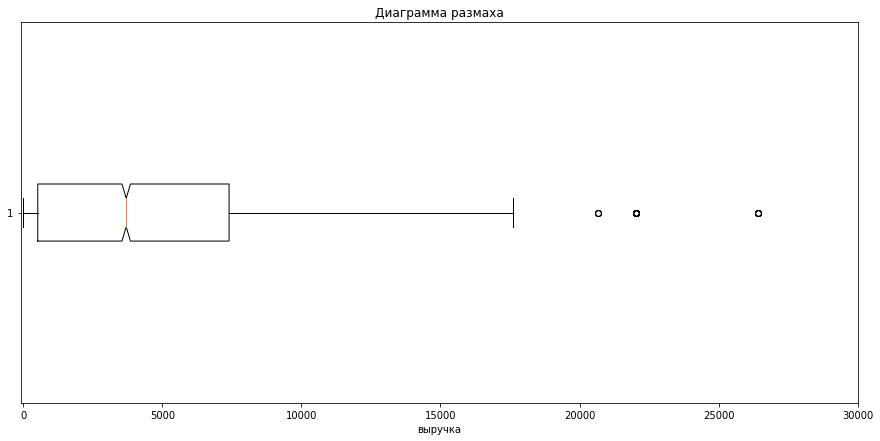

In [12]:
# Строим диаграмму размаха значений в столбце revenue
fig = plt.figure(figsize=(15, 7))
 
ax = fig.add_subplot(111)
plt.boxplot(final_tickets_orders_df[final_tickets_orders_df['currency_code']=='kzt']['revenue'], ax.set_xlim(-100, 30000),  vert=False)

# Добавляем заголовок и метки оси
plt.title('Диаграмма размаха')
plt.xlabel('выручка')

# Выводим график
plt.show()

In [13]:
# проводим сортировку для определения крайних значений
final_tickets_orders_df['revenue'].sort_values()

226456      -90.76
85725       -17.94
11637       -10.77
227716      -10.77
119935      -10.77
            ...   
122431    64939.63
111593    64939.63
122429    81174.54
122430    81174.54
183909    81174.54
Name: revenue, Length: 290849, dtype: float64

In [14]:
# отбераем значения по 99-му процентилю от каждой валюты, поэтому в currency_code её указываем 
final_tickets_orders_df_copy_rub = final_tickets_orders_df[(final_tickets_orders_df['currency_code']=='rub')&(
    final_tickets_orders_df['revenue'] <= final_tickets_orders_df[final_tickets_orders_df['currency_code']=='rub']['revenue'].quantile(0.99))&(
    final_tickets_orders_df['revenue'] >= final_tickets_orders_df[final_tickets_orders_df['currency_code']=='rub']['revenue'].quantile(0.01))]
final_tickets_orders_df_copy_rub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282541 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               282541 non-null  int64         
 1   user_id                282541 non-null  object        
 2   created_dt_msk         282541 non-null  datetime64[ns]
 3   created_ts_msk         282541 non-null  datetime64[ns]
 4   event_id               282541 non-null  int64         
 5   cinema_circuit         282541 non-null  object        
 6   age_limit              282541 non-null  int8          
 7   currency_code          282541 non-null  object        
 8   device_type_canonical  282541 non-null  object        
 9   revenue                282541 non-null  float64       
 10  service_name           282541 non-null  object        
 11  tickets_count          282541 non-null  int8          
 12  total                  282541 non-null  floa

In [15]:
# отбераем значения по kzt
final_tickets_orders_df_copy_kzt = final_tickets_orders_df[(final_tickets_orders_df['currency_code']=='kzt')&(
    final_tickets_orders_df['revenue'] <= final_tickets_orders_df[final_tickets_orders_df['currency_code']=='kzt']['revenue'].quantile(0.99))&(
    final_tickets_orders_df['revenue'] >= final_tickets_orders_df[final_tickets_orders_df['currency_code']=='kzt']['revenue'].quantile(0.01))]
final_tickets_orders_df_copy_kzt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 73 to 290727
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               4991 non-null   int64         
 1   user_id                4991 non-null   object        
 2   created_dt_msk         4991 non-null   datetime64[ns]
 3   created_ts_msk         4991 non-null   datetime64[ns]
 4   event_id               4991 non-null   int64         
 5   cinema_circuit         4991 non-null   object        
 6   age_limit              4991 non-null   int8          
 7   currency_code          4991 non-null   object        
 8   device_type_canonical  4991 non-null   object        
 9   revenue                4991 non-null   float64       
 10  service_name           4991 non-null   object        
 11  tickets_count          4991 non-null   int8          
 12  total                  4991 non-null   float64       
 13  

In [16]:
final_tickets_orders_df_copy = pd.concat([final_tickets_orders_df_copy_rub, final_tickets_orders_df_copy_kzt],axis=0)
final_tickets_orders_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287532 entries, 0 to 290727
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               287532 non-null  int64         
 1   user_id                287532 non-null  object        
 2   created_dt_msk         287532 non-null  datetime64[ns]
 3   created_ts_msk         287532 non-null  datetime64[ns]
 4   event_id               287532 non-null  int64         
 5   cinema_circuit         287532 non-null  object        
 6   age_limit              287532 non-null  int8          
 7   currency_code          287532 non-null  object        
 8   device_type_canonical  287532 non-null  object        
 9   revenue                287532 non-null  float64       
 10  service_name           287532 non-null  object        
 11  tickets_count          287532 non-null  int8          
 12  total                  287532 non-null  floa

In [17]:
# объединяем по "Рекомендации"
final_tickets_orders_df_new = final_tickets_orders_df_copy.merge(final_tickets_events_df, how='left', on='event_id')
final_tickets_orders_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287532 entries, 0 to 287531
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287532 non-null  int64         
 1   user_id                 287532 non-null  object        
 2   created_dt_msk          287532 non-null  datetime64[ns]
 3   created_ts_msk          287532 non-null  datetime64[ns]
 4   event_id                287532 non-null  int64         
 5   cinema_circuit          287532 non-null  object        
 6   age_limit               287532 non-null  int8          
 7   currency_code           287532 non-null  object        
 8   device_type_canonical   287532 non-null  object        
 9   revenue                 287532 non-null  float64       
 10  service_name            287532 non-null  object        
 11  tickets_count           287532 non-null  int8          
 12  total                   287532

In [18]:
final_tickets_orders_converted = final_tickets_orders_df_new.merge(final_tickets_tenge_df, how='left', left_on='created_dt_msk', right_on='data')
final_tickets_orders_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287532 entries, 0 to 287531
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287532 non-null  int64         
 1   user_id                 287532 non-null  object        
 2   created_dt_msk          287532 non-null  datetime64[ns]
 3   created_ts_msk          287532 non-null  datetime64[ns]
 4   event_id                287532 non-null  int64         
 5   cinema_circuit          287532 non-null  object        
 6   age_limit               287532 non-null  int8          
 7   currency_code           287532 non-null  object        
 8   device_type_canonical   287532 non-null  object        
 9   revenue                 287532 non-null  float64       
 10  service_name            287532 non-null  object        
 11  tickets_count           287532 non-null  int8          
 12  total                   287532

In [19]:
final_tickets_orders_converted['revenue_rub'] = final_tickets_orders_converted.apply(lambda x: x['revenue']*x['curs']/100 if x['currency_code']=='kzt' else x['revenue'], axis=1)
# final_tickets_orders_converted.head()

In [20]:
# удалили лишние столбцы из датафрейма
tenge_data = ['data', 'nominal', 'curs', 'cdx']
final_tickets_orders_converted = final_tickets_orders_converted.drop(tenge_data, axis=1)

In [21]:
final_tickets_orders_converted['one_ticket_revenue_rub'] = final_tickets_orders_converted['revenue']/final_tickets_orders_converted['tickets_count']  

In [22]:
# выделим месяц оформления заказа в отдельный столбец  month
final_tickets_orders_converted['month']=pd.to_datetime(final_tickets_orders_converted['created_dt_msk']).dt.month

In [23]:
def season(x): 
    if 8>=x>=6:
        return 'лето'
    elif 11>=x>=9:
        return 'осень'
    elif 5>=x>=3:
        return 'весна'
    else:
        return 'зима'

final_tickets_orders_converted['season'] = final_tickets_orders_converted['month'].apply(season)

In [24]:
final_tickets_orders_converted.duplicated().sum()

0

In [25]:
# проверяем дубликаты
final_tickets_orders_converted.duplicated(subset=['user_id', 'created_ts_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total']).sum()

39

In [26]:
# удаляем дубликаты
final_tickets_orders_converted = final_tickets_orders_converted.drop_duplicates(subset=['user_id', 'created_ts_msk'])

In [27]:
# Анализ категориальных значений
for column in ['age_limit', 'currency_code', 'device_type_canonical', 'service_name']:
    print(f"\nColumn: {column}")
    print("Unique values:", final_tickets_orders_converted[column].unique())
    print("Missing values count:", final_tickets_orders_converted[column].isna().sum())
    print("Value counts:")
    print(final_tickets_orders_converted[column].value_counts(dropna=False), "\n")


Column: age_limit
Unique values: [16  0 18 12  6]
Missing values count: 0
Value counts:
16    77934
12    61682
0     60938
6     51316
18    35495
Name: age_limit, dtype: int64 


Column: currency_code
Unique values: ['rub' 'kzt']
Missing values count: 0
Value counts:
rub    282377
kzt      4988
Name: currency_code, dtype: int64 


Column: device_type_canonical
Unique values: ['mobile' 'desktop']
Missing values count: 0
Value counts:
mobile     230037
desktop     57328
Name: device_type_canonical, dtype: int64 


Column: service_name
Unique values: ['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Зе Бес

In [28]:
final_tickets_orders_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287365 entries, 0 to 287531
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287365 non-null  int64         
 1   user_id                 287365 non-null  object        
 2   created_dt_msk          287365 non-null  datetime64[ns]
 3   created_ts_msk          287365 non-null  datetime64[ns]
 4   event_id                287365 non-null  int64         
 5   cinema_circuit          287365 non-null  object        
 6   age_limit               287365 non-null  int8          
 7   currency_code           287365 non-null  object        
 8   device_type_canonical   287365 non-null  object        
 9   revenue                 287365 non-null  float64       
 10  service_name            287365 non-null  object        
 11  tickets_count           287365 non-null  int8          
 12  total                   287365

In [29]:
part_cleaned_final_tickets_orders = final_tickets_orders_converted['order_id'].count()/final_tickets_orders_df['order_id'].count()
part_cleaned_final_tickets_orders

0.9880212756447504

Полученный датафрейм "final_tickets_orders_converted" содержит 28 столбцов 287395 строк. Начальный датафрейм  "final_tickets_orders_df" содержал 14 столбцов 290849 строк.  От начального датафрейма осталось 99%. 
Мы исключили выбросы по значению "revenue" отобрав значения по 99-му процентилю, и удалили отрицательные значения по 1-му процентилю.

Также мы объединили с "final_tickets_events_df" и добавили в датафрейм новые столбцы: 
- "revenue_rub" - выручка с заказа к единой валюте российском рубле, 
- "one_ticket_revenue_rub" -  выручка с продажи одного билета на мероприятие,
- "month"   - месяц оформления заказа, 
- "season"  - столбец с информацией о сезонности.

### Исследовательский анализ данных

#### Анализ распределения заказов по сегментам и их сезонные изменения. 

Количество заказов для каждого месяца

<Figure size 864x432 with 0 Axes>

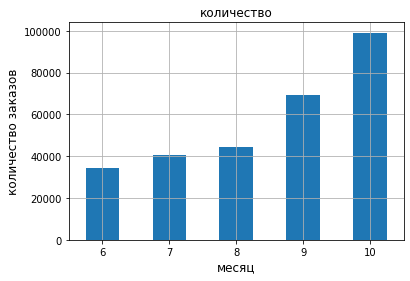

In [30]:
final_tickets_orders_converted_count = final_tickets_orders_converted.groupby('month')['order_id'].count().reset_index()
# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
final_tickets_orders_converted_count.plot(kind='bar', 
                   x='month', 
                   y='order_id', 
                   rot=0, 
                   legend=False, 
                   title=f'количество')

# Настраиваем оформление графика
plt.xlabel('месяц', fontsize=12)
plt.ylabel('количество заказов', fontsize=12)
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Распределение заказов билетов для осеннего и летнего периодов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу

In [31]:
# вычисляем долю распределения заказов по типу мероприятия осенью
event_group_autumn = (final_tickets_orders_converted[final_tickets_orders_converted['season']=='осень'].groupby('event_type_main')['order_id'].count()).reset_index()
event_group_autumn['event_part'] = event_group_autumn['order_id']/(event_group_autumn['order_id'].sum()) * 100

# вычисляем долю распределения заказов по типу мероприятия летом
event_group_summer = (final_tickets_orders_converted[final_tickets_orders_converted['season']=='лето'].groupby('event_type_main')['order_id'].count()).reset_index()
event_group_summer['event_part'] = event_group_summer['order_id']/(event_group_summer['order_id'].sum()) * 100


<Figure size 1152x576 with 0 Axes>

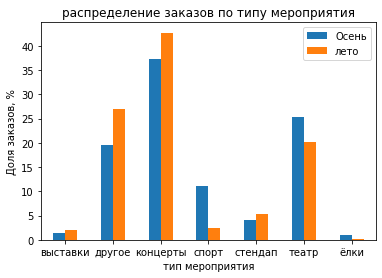

In [32]:
# визуализируем полученные результаты
index = event_group_summer['event_type_main']
data = {'Осень': event_group_autumn['event_part'],
        'лето': event_group_summer['event_part']}
plt.figure(figsize=(16, 8))

df = pd.DataFrame(data)
df = df.set_index(pd.Index(index))

df.plot(kind='bar', rot=0)
plt.title('распределение заказов по типу мероприятия', fontsize=12)

plt.xlabel('тип мероприятия')
plt.ylabel('Доля заказов, %')

plt.show()

In [33]:
final_tickets_orders_converted.groupby('age_limit')['order_id'].count()

age_limit
0     60938
6     51316
12    61682
16    77934
18    35495
Name: order_id, dtype: int64

In [34]:
# вычисляем долю распределения заказов по типу устройств
event_group_device_type_autumn = (final_tickets_orders_converted[final_tickets_orders_converted['season']=='осень'].groupby('device_type_canonical')['order_id'].count()).reset_index()
event_group_device_type_autumn['event_part'] = event_group_device_type_autumn['order_id']/(event_group_device_type_autumn['order_id'].sum()) * 100

event_group_device_type_summer = (final_tickets_orders_converted[final_tickets_orders_converted['season']=='лето'].groupby('device_type_canonical')['order_id'].count()).reset_index()
event_group_device_type_summer['event_part'] = event_group_device_type_summer['order_id']/(event_group_device_type_summer['order_id'].sum()) * 100


<Figure size 1152x576 with 0 Axes>

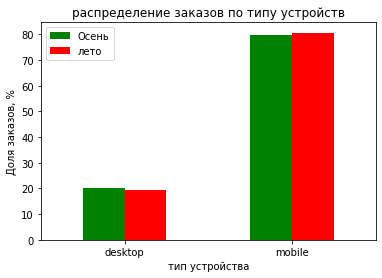

In [35]:
# визуализируем полученные результаты
index = event_group_device_type_summer['device_type_canonical']
data = {'Осень': event_group_device_type_autumn['event_part'],
        'лето': event_group_device_type_summer['event_part']}
plt.figure(figsize=(16, 8))
color = ['g', 'r']

df = pd.DataFrame(data)
df = df.set_index(pd.Index(index))

df.plot(kind='bar', color=color, rot=0)

plt.title('распределение заказов по типу устройств', fontsize=12)
plt.xlabel('тип устройства')
plt.ylabel('Доля заказов, %')

plt.show()

In [36]:
# вычисляем долю распределения заказов по категория мероприятия по возрастному рейтингу
event_group_age_limit_autumn = (final_tickets_orders_converted[final_tickets_orders_converted['season']=='осень'].groupby('age_limit')['order_id'].count()).reset_index()
event_group_age_limit_autumn['event_part'] = event_group_age_limit_autumn['order_id']/(event_group_age_limit_autumn['order_id'].sum()) * 100

event_group_age_limit_summer = (final_tickets_orders_converted[final_tickets_orders_converted['season']=='лето'].groupby('age_limit')['order_id'].count()).reset_index()
event_group_age_limit_summer['event_part'] = event_group_age_limit_summer['order_id']/(event_group_age_limit_summer['order_id'].sum()) * 100


<Figure size 1152x576 with 0 Axes>

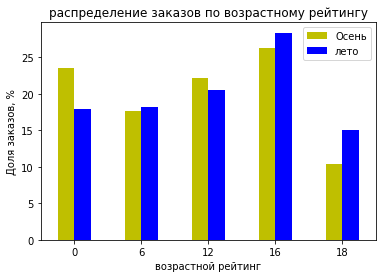

In [37]:
# визуализируем полученные результаты
index = event_group_age_limit_summer['age_limit']
data = {'Осень': event_group_age_limit_autumn['event_part'],
        'лето': event_group_age_limit_summer['event_part']}
plt.figure(figsize=(16, 8))
color = ['y', 'b']

df = pd.DataFrame(data)
df = df.set_index(pd.Index(index))

df.plot(kind='bar', color=color, rot=0)

plt.title('распределение заказов по возрастному рейтингу', fontsize=12)
plt.xlabel('возрастной рейтинг')
plt.ylabel('Доля заказов, %')

plt.show()

Изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью

In [38]:
# вычисляем  выручку с продажи одного билета по типу мероприятия осенью
event_group_revenue_autumn = (final_tickets_orders_converted[final_tickets_orders_converted['season']=='осень'].groupby('event_type_main')['one_ticket_revenue_rub'].mean()).reset_index()

# вычисляем  выручку с продажи одного билета по типу мероприятия летом
event_group_revenue_summer = (final_tickets_orders_converted[final_tickets_orders_converted['season']=='лето'].groupby('event_type_main')['one_ticket_revenue_rub'].mean()).reset_index()


<Figure size 1152x576 with 0 Axes>

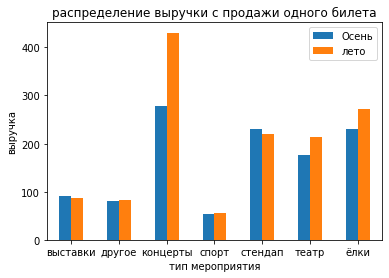

In [39]:
# визуализируем полученные результаты
index = event_group_summer['event_type_main']
data = {'Осень': event_group_revenue_autumn['one_ticket_revenue_rub'],
        'лето': event_group_revenue_summer['one_ticket_revenue_rub']}
plt.figure(figsize=(16, 8))

df = pd.DataFrame(data)
df = df.set_index(pd.Index(index))

df.plot(kind='bar', rot=0)
plt.title('распределение выручки с продажи одного билета', fontsize=12)

plt.xlabel('тип мероприятия')
plt.ylabel('выручка')

plt.show()

Вывод.
- Количество заказов для летних месяцев ниже чем осенних. Летом в основном все отдыхают в отпусках и на каникулах. Осенью количество заказов резко увеличивается.
- Если рассматривать распределение заказов билетов для осеннего и летнего периодов по типам мероприятия ,то летом больше заказов на "концерты", "стендап", "другое", осенью популярнее "театр" и "спорт".
- Летом больше заказов с мобильных устройств, осенью с стационарных.
- В категориях мероприятия по возрастному рейтингу получается что летом востребованее взрослые категории "16" и "18", осенью "0" и "12".
- В разрезе разных типов мероприятий наблюдается изменение средней выручки одного билета. Летом больше выручка с "концерты" и "ёлки". Осенью - "стендап" и "выставки".

In [40]:
# вычисляем относительное изменение осенних значений по сравнению с летними

event_group_revenue_autumn = event_group_revenue_autumn.rename(columns={'one_ticket_revenue_rub': 'one_ticket_revenue_rub_autumn'})
event_group_revenue_summer = event_group_revenue_summer.rename(columns={'one_ticket_revenue_rub': 'one_ticket_revenue_rub_summer'})

event_group_revenue_part_autumn = event_group_revenue_autumn.merge(event_group_revenue_summer, how='left', on='event_type_main')

event_group_revenue_part_autumn['revenue_part_autumn'] = ((event_group_revenue_part_autumn['one_ticket_revenue_rub_autumn']/
                                                           event_group_revenue_part_autumn['one_ticket_revenue_rub_summer'])*100-100)


event_group_revenue_part_autumn

,event_type_main,one_ticket_revenue_rub_autumn,one_ticket_revenue_rub_summer,revenue_part_autumn
0,выставки,91.917315,86.706855,6.009282
1,другое,80.843698,82.443903,-1.940962
2,концерты,278.861867,430.498063,-35.223433
3,спорт,54.010329,55.255205,-2.252957
4,стендап,231.140324,219.044442,5.522113
5,театр,176.001006,214.200464,-17.833509
6,ёлки,229.585589,271.436176,-15.418205


<Figure size 1152x576 with 0 Axes>

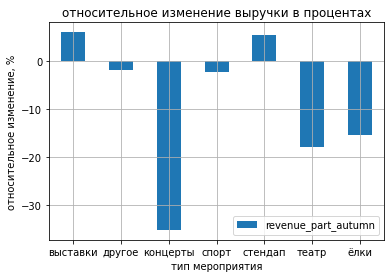

In [41]:
# визуализируем полученные результаты
index = event_group_revenue_part_autumn['event_type_main']

plt.figure(figsize=(16, 8))

df = pd.DataFrame(event_group_revenue_part_autumn['revenue_part_autumn'])
df = df.set_index(pd.Index(index))

df.plot(kind='bar', rot=0)
plt.title('относительное изменение выручки в процентах', fontsize=12)
plt.grid()
plt.xlabel('тип мероприятия')
plt.ylabel('относительное изменение, %')

plt.show()

#### Осенняя активность пользователей

<Figure size 1152x432 with 0 Axes>

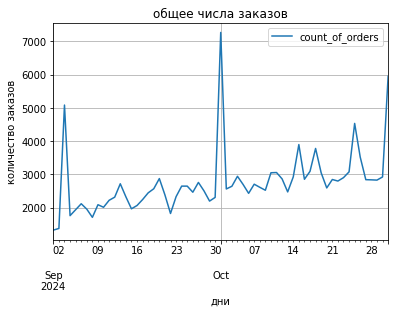

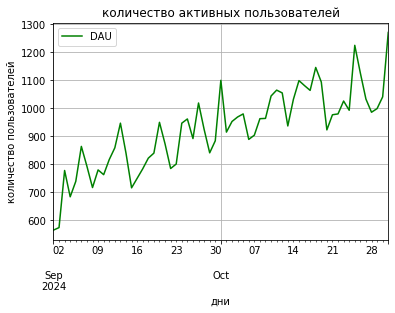

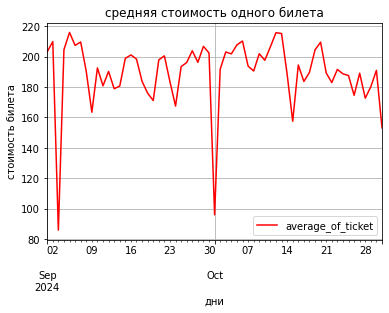

In [42]:
# Сгруппируем датафрейм по количеству заказов, пользователей и средней выручки с билета
orders_multi_agg = final_tickets_orders_converted[final_tickets_orders_converted['season']=='осень'].groupby(
    'created_dt_msk').agg(count_of_orders=('order_id', 'count'), DAU=('user_id', 'nunique'), 
                          average_of_ticket=('one_ticket_revenue_rub', 'mean')
                         ).reset_index()

plt.figure(figsize=(16, 6))
orders_multi_agg.plot(kind='line', 
                   x='created_dt_msk',
                   y='count_of_orders',
                   rot=0, grid=True, 
                   legend=True, xlabel='дни', ylabel='количество заказов',
                   title=f'общее числа заказов')

orders_multi_agg.plot(kind='line', 
                   x='created_dt_msk',
                   y='DAU',
                   rot=0, grid=True,
                   legend=True, color='g', xlabel='дни',  ylabel='количество пользователей',
                   title=f'количество активных пользователей') 

orders_multi_agg.plot(kind='line', 
                   x='created_dt_msk',
                   y='average_of_ticket',
                   rot=0, grid=True,
                   legend=True,  color='r', xlabel='дни', ylabel='стоимость билета',
                   title=f'средняя стоимость одного билета') 


# Выводим график
plt.show()

<Figure size 720x432 with 0 Axes>

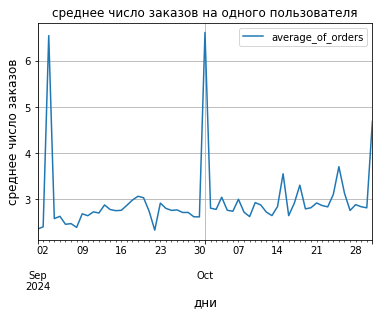

In [43]:
#
orders_multi_agg['average_of_orders']= orders_multi_agg['count_of_orders']/orders_multi_agg['DAU']

plt.figure(figsize=(10, 6))
orders_multi_agg.plot(kind='line', 
                   x='created_dt_msk',
                   y='average_of_orders',   
                   rot=0, 
                   legend=True, 
                   title=f'среднее число заказов на одного пользователя')  

# Настраиваем оформление графика
plt.xlabel('дни', fontsize=12)
plt.ylabel('среднее число заказов', fontsize=12)

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

/tmp/ipykernel_48/1881077590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['created_dt_msk'].dt.dayofweek


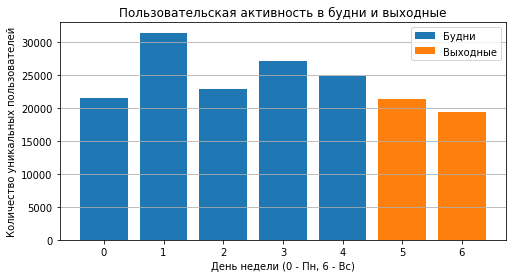

In [44]:
# Изучим недельную цикличность. Выделим день недели и сравним пользовательскую активность в будни и выходные

final_tickets_orders_weekday = final_tickets_orders_converted[final_tickets_orders_converted['season']=='осень']

def analyze_weekday_activity(df):
    
     
        # Добавление столбца с днем недели (0 - понедельник, 6 - воскресенье)
        df['weekday'] = df['created_dt_msk'].dt.dayofweek

        # Разделение на будни и выходные
        df_weekday = df[df['weekday'].isin([0, 1, 2, 3, 4])]  # Будни
        df_weekend = df[df['weekday'].isin([5, 6])]  # Выходные

        # Подсчет количества заказов в каждый день недели
        weekday_counts = df_weekday.groupby('weekday')['order_id'].count()
        weekend_counts = df_weekend.groupby('weekday')['order_id'].count()

        # Создание графика
        plt.figure(figsize=(8, 4))
        plt.bar(weekday_counts.index, weekday_counts.values, label='Будни')
        plt.bar(weekend_counts.index, weekend_counts.values, label='Выходные')
        plt.xlabel('День недели (0 - Пн, 6 - Вс)')
        plt.ylabel('Количество уникальных пользователей')
        plt.title('Пользовательская активность в будни и выходные')
        plt.xticks(range(7)) 
        plt.legend()
        plt.grid(axis='y')
        
        return plt.gcf()

    

fig = analyze_weekday_activity(final_tickets_orders_weekday)
plt.show()

В результате анализа получили данные пользовательской активности и недельной цикличности.
- За два осенних месяца на линейных графиках виден рост общего числа заказов и количества активных пользователей.
Также наблюдаем всплески, кратковременное увеличение почти в два раза: в начале сентября, в конце сентября-начало октября, в конце октября. Может пользователя пытаются закрыть свой план в конце месяца или в основном получают зарплату в этих числах.
- Средняя выручка с билета снижалась в конце каждого месяца.
- При сравнении пользовательской активность по дням недели, то больше всего заказов во вторник, меньше - в воскресенье.

#### Популярные события и партнёры

In [45]:
# выбираем популярные регионы
final_tickets_region = final_tickets_orders_converted[final_tickets_orders_converted['season']=='осень'].groupby(
    'region_name').agg({'event_id':'nunique', 'order_id':'count'}).sort_values(by='event_id', ascending=False).reset_index()
final_tickets_region['order_id_part'] = final_tickets_region['order_id']/final_tickets_region['order_id'].sum()

final_tickets_region.head(7)

,region_name,event_id,order_id,order_id_part
0,Каменевский регион,3910,46662,0.277309
1,Североярская область,2611,20698,0.123007
2,Широковская область,796,8645,0.051377
3,Светополянский округ,762,4763,0.028306
4,Речиновская область,529,3564,0.021181
5,Серебринская область,456,4467,0.026547
6,Яблоневская область,431,4195,0.024931


<Figure size 864x432 with 0 Axes>

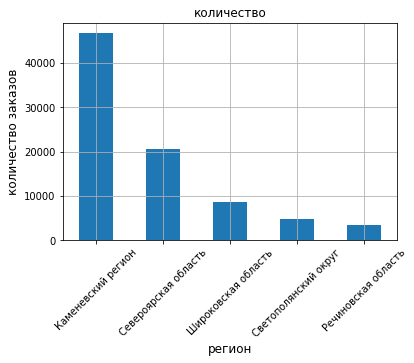

In [46]:
# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
final_tickets_region.head(5).plot(kind='bar', 
                   x='region_name', 
                   y='order_id', 
                   rot=0.5, 
                   legend=False, 
                   title=f'количество')

# Настраиваем оформление графика
plt.xlabel('регион', fontsize=12)
plt.ylabel('количество заказов', fontsize=12)
plt.xticks(rotation=45)
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [47]:
# выбираем популярные сервисы
final_tickets_service = final_tickets_orders_converted[final_tickets_orders_converted['season']=='осень'].groupby(
    'service_name').agg({'event_id':'nunique', 'order_id':'count', 'revenue_rub':'sum'}).sort_values(by='event_id', ascending=False).reset_index()
final_tickets_service['order_id_part'] = final_tickets_service['order_id']/final_tickets_service['order_id'].sum()
final_tickets_service['revenue_rub_part'] = (final_tickets_service['revenue_rub']/final_tickets_service['revenue_rub'].sum()).round(5)

final_tickets_service.head(5)

,service_name,event_id,order_id,revenue_rub,order_id_part,revenue_rub_part
0,Лови билет!,3611,25758,1.037225e+07,0.153058,0.12688
1,Билеты без проблем,2836,32287,1.211529e+07,0.191854,0.14820
2,Билеты в руки,2458,25620,7.609778e+06,0.152238,0.09309
3,Облачко,1409,15477,1.061055e+07,0.091967,0.12980
4,Лучшие билеты,1390,12412,1.675712e+06,0.073754,0.02050


<Figure size 864x432 with 0 Axes>

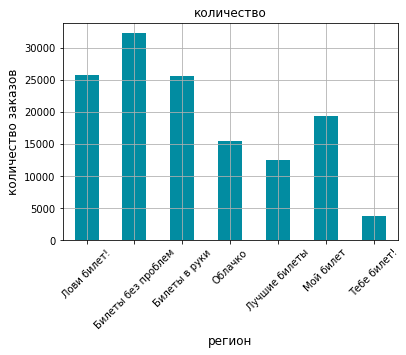

In [48]:
# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
final_tickets_service.head(7).plot(kind='bar', 
                   x='service_name', 
                   y='order_id', 
                   rot=0.5, 
                   legend=False, color = '#028ca1', 
                   title=f'количество')

# Настраиваем оформление графика
plt.xlabel('регион', fontsize=12)
plt.ylabel('количество заказов', fontsize=12)
plt.xticks(rotation=45)
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Если смотреть по уникальному количеству мероприятий и общему числу заказов для каждого региона. То получиться три основных региона "Каменевский регион", "Североярская область", "Широковская область" на долю которых приходиться более 40% заказов.

Среди билетных партнёров по общему числу уникальных мероприятий выделяются "Лови билет!" - 3616, "Билеты без проблем" - 2842, "Билеты в руки" - 2460.

### Статистический анализ данных

1. Гипотеза: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств

Нулевая гипотеза  𝐻0:𝜇mobile≤𝜇desktop

Среднее количество заказов мобильного приложения не больше, чем стационарных устройств.

Альтернативная гипотеза  𝐻1:𝜇mobile>𝜇desktop

Среднее количество заказов мобильного приложения больше, и это различие статистически значимо.

In [49]:
# проверяем на независимость групп
mobile = final_tickets_orders_converted[(final_tickets_orders_converted['device_type_canonical']=='mobile')&(
    final_tickets_orders_converted['season']=='осень')]['user_id'].unique()
len(mobile)

14179

In [50]:
desktop = final_tickets_orders_converted[(final_tickets_orders_converted['device_type_canonical']=='desktop')&(
    final_tickets_orders_converted['season']=='осень')]['user_id'].unique()
len(desktop)

4869

In [51]:
# проверяем на независимость групп
intersection = list(set(mobile) & set(desktop))
len(intersection) 

3249

In [52]:
# удаляем пользователей которые пользуются и мобильной и десктопной версией
final_tickets_orders_cleaned = final_tickets_orders_converted[~final_tickets_orders_converted['user_id'].isin(intersection)] 


In [53]:
# выборка целевой метрики для группы A, среднее количество заказов на одного пользователя мобильного приложения осенью
A_inter = final_tickets_orders_cleaned[(final_tickets_orders_cleaned['device_type_canonical']=='mobile')&(final_tickets_orders_cleaned['season']=='осень')].groupby(
    'user_id').agg({'order_id':'nunique'}).sort_values(by='order_id', ascending=False).reset_index()
A_inter

,user_id,order_id
0,f69ede3411d9a97,123
1,0ae42a8c1d07049,73
2,3530a91eedecc9a,62
3,41024e5c67313be,59
4,e609842e020a10f,55
...,...,...
10925,71d57388e6a38e6,1
10926,71d555bc64735bc,1
10927,71cdd22f3c16232,1
10928,71bf83da09c9ef7,1


In [54]:
# выборка целевой метрики для группы B, среднее количество заказов на одного пользователя десктопного приложения осенью
B_inter = final_tickets_orders_cleaned[(final_tickets_orders_cleaned['device_type_canonical']=='desktop')&(
    final_tickets_orders_cleaned['season']=='осень')].groupby('user_id').agg({'order_id':'nunique'}).sort_values(
    by='order_id', ascending=False).reset_index()
B_inter

,user_id,order_id
0,2cba8e7c2420f5b,56
1,b14d95aab20f46d,44
2,cbe06d8837e87fb,44
3,a00c83aac8fea5f,43
4,4c124b6d79dc691,28
...,...,...
1615,6092f2474823e5b,1
1616,608f947fda0af22,1
1617,608f91325cb756b,1
1618,60728980f4a0f11,1


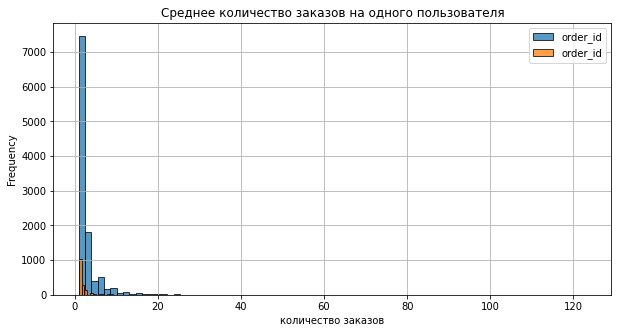

In [55]:
plt.figure(figsize=(10, 5))

# Строим гистограмму с помощью pandas через plot(kind='hist')
A_inter['order_id'].plot(
                kind='hist', # Тип графика — гистограмма
                bins=80, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black'
)

B_inter['order_id'].plot(
                kind='hist', # Тип графика — гистограмма
                bins=80, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black'
)


# Настраиваем оформление графика
plt.title('Среднее количество заказов на одного пользователя')
plt.xlabel('количество заказов')
plt.legend()

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

In [56]:
# Вычисляем средние
display(A_inter['order_id'].mean())
display(B_inter['order_id'].mean())

2.8558096980786827

1.9790123456790123

In [57]:
# Вычисляем стандартное отклонение
display(A_inter['order_id'].std())
display(B_inter['order_id'].std())

4.093302400112391

3.0654066591985565

Будем использовать тест Манна — Уитни. В отличие от t-теста, он не требует нормальности выборочных средних и не является чувствительным к выбросам, поэтому этап проверки распределения на тяжёлые хвосты можно пропустить.

In [58]:
# Выборка целевой метрики для группы A
metric_a = A_inter.order_id 
# Выборка целевой метрики для группы B
metric_b = B_inter.order_id 

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='greater' # Альтернативная гипотеза «больше»: распределение, лежащее в основе стохастически меньше
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=1.337654386961107e-38 < 0.05
Нулевая гипотеза не находит подтверждения!


2. Гипотеза: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

Нулевая гипотеза  𝐻0:𝜇mobile≤𝜇desktop

Среднее время между заказами мобильного приложения не больше, чем стационарных устройств.

Альтернативная гипотеза  𝐻1:𝜇mobile>𝜇desktop

Среднее время между заказами мобильного приложения больше, и это различие статистически значимо.


In [59]:
# выборка целевой метрики для группы A, среднее количество дней между покупками на одного пользователя мобильного приложения осенью
# c количеством дней с предыдущей покупки >0
A_inter_day = final_tickets_orders_cleaned[(final_tickets_orders_cleaned['device_type_canonical']=='mobile')&(
    final_tickets_orders_cleaned['season']=='осень')&(final_tickets_orders_cleaned['days_since_prev']>0)].groupby(
    'user_id').agg({'order_id':'count', 'days_since_prev':'mean'}).sort_values(by='order_id', ascending=False).reset_index()


In [60]:
B_inter_day = final_tickets_orders_cleaned[(final_tickets_orders_cleaned['device_type_canonical']=='desktop')&(
    final_tickets_orders_cleaned['season']=='осень')&(final_tickets_orders_cleaned['days_since_prev']>0)].groupby(
    'user_id').agg({'order_id':'count', 'days_since_prev':'mean'}).sort_values(by='days_since_prev', ascending=False).reset_index()


In [61]:
# Вычисляем средние
display(A_inter_day['days_since_prev'].mean())
display(B_inter_day['days_since_prev'].mean())

38.55983786208041

53.96460349902379

In [62]:
# Выборка целевой метрики для группы A
metric_a = B_inter_day.days_since_prev 
# Выборка целевой метрики для группы B
metric_b = A_inter_day.days_since_prev
# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='less' # Альтернативная гипотеза «больше»: распределение, лежащее в основе стохастически меньше
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=1.0 > 0.05
Нулевая гипотеза находит подтверждение!


Результат тестов. 

Вначале проверяем на независимость групп, пользователей которые использовали и мобильный и стационарный способ заказа удаляем.

Проверяем две гипотезы относительно активности пользователей мобильных и стационарных устройств. 
1. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
Пользователи мобильных устройств в среднем больше делают заказов, чем пользователи стационарных устройств, значения средних показывают 2.864 и 1.976. Для проведения анализа используем  тест Манна — Уитни. T-тест в качестве условия требует нормального распределения выборочного среднего, то есть у распределения не должно быть тяжёлых хвостов и выбросов. У теста Манна — Уитни таких требований нет, и он нечувствителен к выбросам из-за рангового преобразования. 
* Нулевая гипотеза H0 : 
Среднее количество заказов мобильного приложения не больше, чем стационарных устройств
* Альтернативная гипотеза  𝐻1:
Среднее количество заказов мобильного приложения больше, и это различие статистически значимо

Уровень статистической значимости устанавливаем равным 5% (α=0.05). Среднее количество заказов в двух выборках не различается. По результату теста определили, что Альтернативная гипотеза подтверждена, среднее количество заказов мобильного приложения больше.

2. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств
* Нулевая гипотеза 𝐻0:
Среднее время между заказами мобильного приложения не больше, чем стационарных устройств.
* Альтернативная гипотеза 𝐻1:
Среднее время между заказами мобильного приложения больше, и это различие статистически значимо.

Нулевая гипотеза находит подтверждения. Значит мы предполагаем, что среднее время между заказами пользователей мобильных приложений одинаково по сравнению с пользователями стационарных устройств.

### Общий вывод и рекомендации

Провели исследовательский анализ данных, чтобы выявить изменения в пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.
Использовали данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года.

Осенью количество заказов увеличивается.
Летом больше заказов на "концерты", "стендап", "другое", осенью популярнее "театр" и "спорт".
Осенью чеще пользуются стационарными устройствами.
В категориях мероприятия по возрастному рейтингу получается что летом востребованее взрослые категории "16" и "18", осенью "0" и "12". 
Средняя выручка с билета примерно одинаковая в течении всего периода.
Явные лидеры по числу заказов три региона "Каменевский регион", "Североярская область", "Широковская область".
Среди билетных партнёров по общему числу уникальных мероприятий выделяются "Лови билет!", "Билеты без проблем" и "Билеты в руки".

Гипотеза что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств подвердилась.
Гипотеза о том, что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, оказалась неверной.

Делаем вывод, что сервис бронирования успешно работает, выручка растет, снижение среднего чека кажется закономерным в силу увеличения трафика пользователей. В рублях наблюдался стабильный рост до конца октября. После чего заметен резкий спад. Возможно это вызвано снижением количества концертов. Удивляет, что очень сильное распределение заказов по регионам, всего несколько регионов являются основыми источниками заказов. Возможно нужно подробнее рассмотреть те регионы, где нет или мало заказов.

При анализе видно, что осенью повысилась динамика и активность пользователей. Причина в том, что с наступлением осени и окончанием летних каникул становиться больше свободного времени и возможности посещать различные мероприятия. Значит в осенний период следует уделять больше внимание информированию пользователей, сделать больше рекламы. Также следует развивать концерты и театры(увеличить предложение, акции), т.к. они приносят наибольшую выручку. Возможно следует улучшить мобильное приложение, потому что для большинства пользователей мобильное устройство является основным для совершения заказа билетов и по подтвержденной гипотезе среднее количество заказов на одного пользователя с мобильного приложения выше чем со стационарных устройств.